# 2.0 Augmentation & Feature Extraction

### Required Modules & Setup

In [48]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image

## 2.3 Pose Reconstruction using Rotation Matrix

Given the limited availability of only two poses from a single pose class, it is imperative to augment the dataset within each class. Through the application of rotational transformations, we are able to estimate the positioning of vectors contingent upon a specified degree of rotation. To comprehensively capture the entirety of the pose, we incrementally generate data by rotating +10 degrees until a full 360-degree rotation is achieved, subsequently validating the original vector against the final vector to ensure consistency and accuracy in the transformation process.

Sources:
- https://stackoverflow.com/questions/6802577/rotation-of-3d-vector
- https://en.wikipedia.org/wiki/Euler%E2%80%93Rodrigues_formula

### Dataset 1

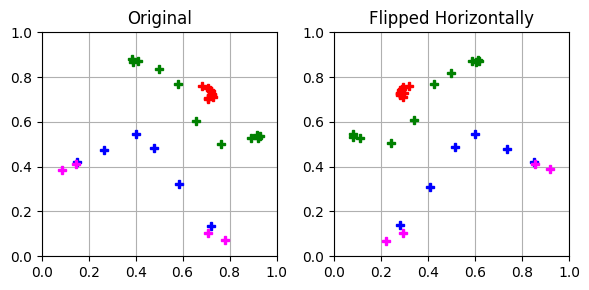

In [98]:
data = pd.read_csv("data/training-set-1/pose_data_raw.csv")

x = data.loc[470, data.columns.str.contains('_x')].tolist()
y = data.loc[470, data.columns.str.contains('_y')].tolist()
x2 = data.loc[471, data.columns.str.contains('_x')].tolist()
y2 = data.loc[471, data.columns.str.contains('_y')].tolist()

fig, axes = plt.subplots(1,2, figsize=(6, 3))
axes[0].plot(x[0:10], y[0:10], color=mcolors.CSS4_COLORS['red'], label="head", marker='P', linestyle='None')
axes[0].plot(x[11:22], y[11:22], color=mcolors.CSS4_COLORS['green'], label="mid body", marker='P', linestyle='None')
axes[0].plot(x[23:29], y[23:29], color=mcolors.CSS4_COLORS['blue'], label="lower body", marker='P', linestyle='None')
axes[0].plot(x[29:33], y[29:33], color=mcolors.CSS4_COLORS['magenta'], label="feet", marker='P', linestyle='None')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_title("Original")
axes[0].grid()

axes[1].plot(x2[0:10], y2[0:10], color=mcolors.CSS4_COLORS['red'], label="head", marker='P', linestyle='None')
axes[1].plot(x2[11:22], y2[11:22], color=mcolors.CSS4_COLORS['green'], label="mid body", marker='P', linestyle='None')
axes[1].plot(x2[23:29], y2[23:29], color=mcolors.CSS4_COLORS['blue'], label="lower body", marker='P', linestyle='None')
axes[1].plot(x2[29:33], y2[29:33], color=mcolors.CSS4_COLORS['magenta'], label="feet", marker='P', linestyle='None')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].grid()
axes[1].set_title("Flipped Horizontally")
fig.tight_layout()
plt.show()

### Dataset 2

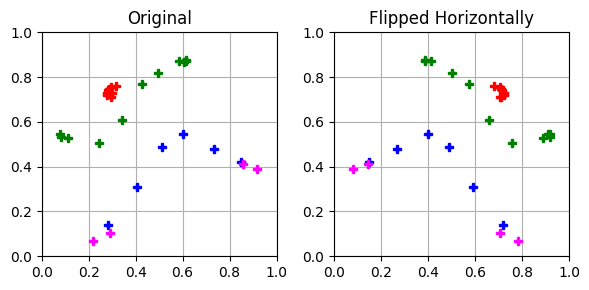

In [101]:
data2 = pd.read_csv("data/training-set-2/pose_data_aug.csv")

x = data2.loc[0, data2.columns.str.contains('_x')].tolist()
y = data2.loc[0, data2.columns.str.contains('_y')].tolist()

x2 = data2.loc[1, data2.columns.str.contains('_x')].tolist()
y2 = data2.loc[1, data2.columns.str.contains('_y')].tolist()

fig, axes = plt.subplots(1,2, figsize=(6, 3))
axes[0].plot(x[0:10], y[0:10], color=mcolors.CSS4_COLORS['red'], label="head", marker='P', linestyle='None')
axes[0].plot(x[11:22], y[11:22], color=mcolors.CSS4_COLORS['green'], label="mid body", marker='P', linestyle='None')
axes[0].plot(x[23:29], y[23:29], color=mcolors.CSS4_COLORS['blue'], label="lower body", marker='P', linestyle='None')
axes[0].plot(x[29:33], y[29:33], color=mcolors.CSS4_COLORS['magenta'], label="feet", marker='P', linestyle='None')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_title("Original")
axes[0].grid()

axes[1].plot(x2[0:10], y2[0:10], color=mcolors.CSS4_COLORS['red'], label="head", marker='P', linestyle='None')
axes[1].plot(x2[11:22], y2[11:22], color=mcolors.CSS4_COLORS['green'], label="mid body", marker='P', linestyle='None')
axes[1].plot(x2[23:29], y2[23:29], color=mcolors.CSS4_COLORS['blue'], label="lower body", marker='P', linestyle='None')
axes[1].plot(x2[29:33], y2[29:33], color=mcolors.CSS4_COLORS['magenta'], label="feet", marker='P', linestyle='None')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].grid()
axes[1].set_title("Flipped Horizontally")
fig.tight_layout()
plt.show()

## Rotation Matrix Implementation (Manual)

In the code below we illustrate how the rotation matrix is implemented and manually applied per selected landmark.

### Choose Pole Stunt Class by Index

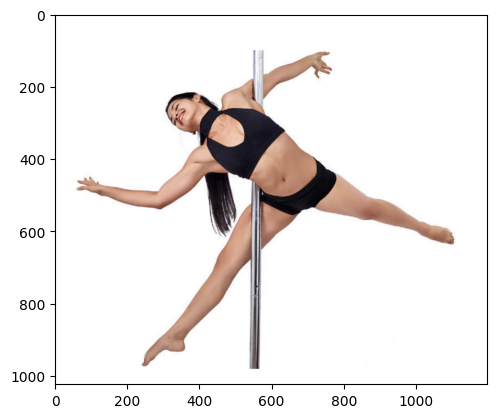

In [89]:
idx = 1
#source_image_dir = 'data/training-set-1/'

source_image_dir = 'data/training-set-2/'
data = data2

ref_image = Image.open(source_image_dir + data['image_filename'][idx])
plt.imshow(ref_image)

In [90]:
def rotation_matrix_per_angle(axis, theta):
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

def rotation_matrix_360(v, axis, angle_increment, full_circle=360):
    rotated_vectors = []
    for angle in np.arange(0, full_circle + 10, angle_increment):
        theta = -np.radians(angle)
        rot_matrix = rotation_matrix_per_angle(axis, theta)
        rotated_v = np.dot(rot_matrix, v)
        rotated_vectors.append(rotated_v)
        
    if np.allclose(rotated_vectors[0], rotated_vectors[-1], atol=1e-6):
        return rotated_vectors
    else:
        return None

# Nose Landmark
x0 = data['landmark_00_x'][idx]
y0 = data['landmark_00_y'][idx] 
z0 = data['landmark_00_z'][idx]

# Right Shoulder and Left Shoulders
x11 = data['landmark_11_x'][idx]  
y11 = data['landmark_11_y'][idx]  
z11 = data['landmark_11_z'][idx]
x12 = data['landmark_12_x'][idx] 
y12 = data['landmark_12_y'][idx]
z12 = data['landmark_12_z'][idx]

# Right Shoulder and Left Elbows
x13 = data['landmark_13_x'][idx]  
y13 = data['landmark_13_y'][idx]
z13 = data['landmark_13_z'][idx]
x14 = data['landmark_14_x'][idx]
y14 = data['landmark_14_y'][idx]
z14 = data['landmark_14_z'][idx]

# Right Shoulder and Left Wrists
x15 = data['landmark_15_x'][idx]  
y15 = data['landmark_15_y'][idx]  
z15 = data['landmark_15_z'][idx]
x16 = data['landmark_16_x'][idx] 
y16 = data['landmark_16_y'][idx]
z16 = data['landmark_16_z'][idx]

# Right and Left Hips
x23 = data['landmark_23_x'][idx]  
y23 = data['landmark_23_y'][idx]  
z23 = data['landmark_23_z'][idx]
x24 = data['landmark_24_x'][idx] 
y24 = data['landmark_24_y'][idx]
z24 = data['landmark_24_z'][idx]

# Right and Left Knees
x25 = data['landmark_25_x'][idx]  
y25 = data['landmark_25_y'][idx] 
z25 = data['landmark_25_z'][idx]
x26 = data['landmark_26_x'][idx] 
y26 = data['landmark_26_y'][idx]
z26 = data['landmark_26_z'][idx]

# Right and Left Ankles
x27 = data['landmark_27_x'][idx]  
y27 = data['landmark_27_y'][idx]  
z27 = data['landmark_27_z'][idx]
x28 = data['landmark_28_x'][idx] 
y28 = data['landmark_28_y'][idx]
z28 = data['landmark_28_z'][idx]


# Original Vectors
v0 = np.asarray([x0, y0, z0])

v11 = np.asarray([x11, y11, z11])
v12 = np.asarray([x12, y12, z12])
v13 = np.asarray([x13, y13, z13])
v14 = np.asarray([x14, y14, z14])
v15 = np.asarray([x15, y15, z15])
v16 = np.asarray([x16, y16, z16])

v23 = np.asarray([x23, y23, z23])
v24 = np.asarray([x24, y24, z24])
v25 = np.asarray([x25, y25, z25])
v26 = np.asarray([x26, y26, z26])
v27 = np.asarray([x27, y27, z27])
v28 = np.asarray([x28, y28, z28])


axis = [0, 1, 0]
angle_increment = 10 

rv0 = rotation_matrix_360(v0, axis, angle_increment)
rv11 = rotation_matrix_360(v11, axis, angle_increment)
rv12 = rotation_matrix_360(v12, axis, angle_increment)
rv13 = rotation_matrix_360(v13, axis, angle_increment)
rv14 = rotation_matrix_360(v14, axis, angle_increment)
rv15 = rotation_matrix_360(v15, axis, angle_increment)
rv16 = rotation_matrix_360(v16, axis, angle_increment)

rv23 = rotation_matrix_360(v23, axis, angle_increment)
rv24 = rotation_matrix_360(v24, axis, angle_increment)
rv25 = rotation_matrix_360(v25, axis, angle_increment)
rv26 = rotation_matrix_360(v26, axis, angle_increment)
rv27 = rotation_matrix_360(v27, axis, angle_increment)
rv28 = rotation_matrix_360(v28, axis, angle_increment)

### Results Evaluation

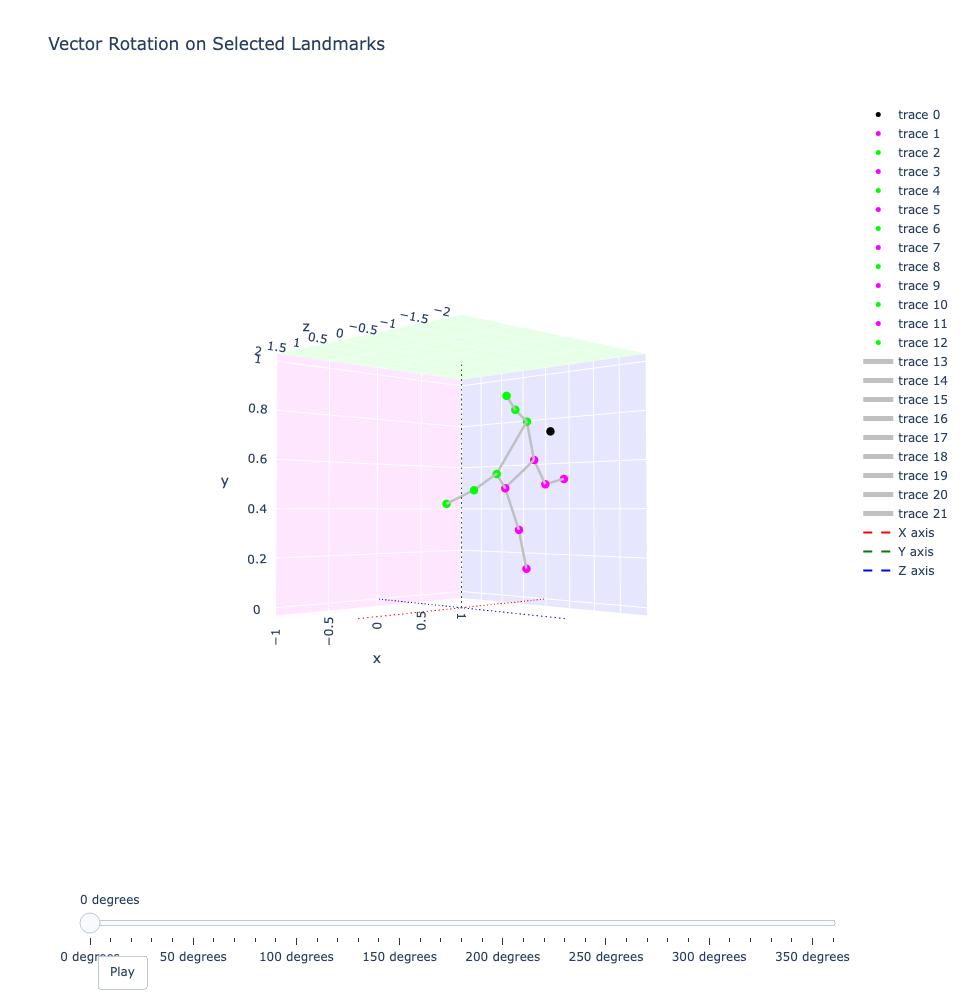

In [91]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(x=[v0[0]], y=[v0[1]], z=[v0[2]], mode='markers', marker=dict(color="black",size=5)),
        
        go.Scatter3d(x=[v11[0]], y=[v11[1]], z=[v11[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v12[0]], y=[v12[1]], z=[v12[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v13[0]], y=[v13[1]], z=[v13[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v14[0]], y=[v14[1]], z=[v14[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v15[0]], y=[v15[1]], z=[v15[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v16[0]], y=[v16[1]], z=[v16[2]], mode='markers', marker=dict(color="lime",size=5)),
        
        go.Scatter3d(x=[v23[0]], y=[v23[1]], z=[v23[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v24[0]], y=[v24[1]], z=[v24[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v25[0]], y=[v25[1]], z=[v25[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v26[0]], y=[v26[1]], z=[v26[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v27[0]], y=[v27[1]], z=[v27[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v28[0]], y=[v28[1]], z=[v28[2]], mode='markers', marker=dict(color="lime",size=5)),
        
        go.Scatter3d(
            x=[v11[0], v12[0], v24[0], v23[0], v11[0]],
            y=[v11[1], v12[1], v24[1], v23[1], v11[1]],
            z=[v11[2], v12[2], v24[2], v23[2], v11[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v11[0], v13[0]],
            y=[v11[1], v13[1]],
            z=[v11[2], v13[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v15[0], v13[0]],
            y=[v15[1], v13[1]],
            z=[v15[2], v13[2]],
            mode='lines',
            line=dict(color='silver', width=5)),
        
        go.Scatter3d(
            x=[v12[0], v14[0]],
            y=[v12[1], v14[1]],
            z=[v12[2], v14[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v16[0], v14[0]],
            y=[v16[1], v14[1]],
            z=[v16[2], v14[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v23[0], v25[0]],
            y=[v23[1], v25[1]],
            z=[v23[2], v25[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v27[0], v25[0]],
            y=[v27[1], v25[1]],
            z=[v27[2], v25[2]],
            mode='lines',
            line=dict(color='silver', width=5)),
        
        go.Scatter3d(
            x=[v24[0], v26[0]],
            y=[v24[1], v26[1]],
            z=[v24[2], v26[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v28[0], v26[0]],
            y=[v28[1], v26[1]],
            z=[v28[2], v26[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

    ],
        
    layout=go.Layout(
        title="Vector Rotation on Selected Landmarks",
            width=700, height=1000, 
            scene=dict(
                xaxis=dict(range=[-1, 1], autorange=False),
                yaxis=dict(range=[0, 1], autorange="reversed"),
                zaxis=dict(range=[-2, 2], autorange=False),
                aspectmode='cube'
            ),
            updatemenus=[{
                "type": "buttons",
                "buttons": [{
                    "label": "Play",
                    "method": "animate",
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                }],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top"
            }],
            sliders=[{
                "steps": [{"method": "animate", "args": [[f"frame{step}"], {"mode": "immediate", "frame": {"duration": 500, "redraw": True}, "transition": {"duration": 300}}], "label": f"{angle_increment * step} degrees"} for step in range(len(rv0))],
            }]
        ),
        frames = [
            go.Frame(
                data=[
                    go.Scatter3d(x=[rv0[step][0]], y=[rv0[step][1]], z=[rv0[step][2]], mode='markers', marker=dict(color="black", size=5)),
                    
                    go.Scatter3d(x=[rv11[step][0]], y=[rv11[step][1]], z=[rv11[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv12[step][0]], y=[rv12[step][1]], z=[rv12[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv13[step][0]], y=[rv13[step][1]], z=[rv13[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv14[step][0]], y=[rv14[step][1]], z=[rv14[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv15[step][0]], y=[rv15[step][1]], z=[rv15[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv16[step][0]], y=[rv16[step][1]], z=[rv16[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    
                    go.Scatter3d(x=[rv23[step][0]], y=[rv23[step][1]], z=[rv23[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv24[step][0]], y=[rv24[step][1]], z=[rv24[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv25[step][0]], y=[rv25[step][1]], z=[rv25[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv26[step][0]], y=[rv26[step][1]], z=[rv26[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv27[step][0]], y=[rv27[step][1]], z=[rv27[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv28[step][0]], y=[rv28[step][1]], z=[rv28[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    
                    go.Scatter3d(
                        x=[rv11[step][0], rv12[step][0], rv24[step][0], rv23[step][0], rv11[step][0]],  # Closing the loop by repeating the first point
                        y=[rv11[step][1], rv12[step][1], rv24[step][1], rv23[step][1], rv11[step][1]],
                        z=[rv11[step][2], rv12[step][2], rv24[step][2], rv23[step][2], rv11[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv11[step][0], rv13[step][0]],
                        y=[rv11[step][1], rv13[step][1]],
                        z=[rv11[step][2], rv13[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv15[step][0], rv13[step][0]],
                        y=[rv15[step][1], rv13[step][1]],
                        z=[rv15[step][2], rv13[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                    
                    go.Scatter3d(
                        x=[rv12[step][0], rv14[step][0]],
                        y=[rv12[step][1], rv14[step][1]],
                        z=[rv12[step][2], rv14[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv16[step][0], rv14[step][0]],
                        y=[rv16[step][1], rv14[step][1]],
                        z=[rv16[step][2], rv14[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                    
                    go.Scatter3d(
                        x=[rv23[step][0], rv25[step][0]],
                        y=[rv23[step][1], rv25[step][1]],
                        z=[rv23[step][2], rv25[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv27[step][0], rv25[step][0]],
                        y=[rv27[step][1], rv25[step][1]],
                        z=[rv27[step][2], rv25[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                    
                    go.Scatter3d(
                        x=[rv24[step][0], rv26[step][0]],
                        y=[rv24[step][1], rv26[step][1]],
                        z=[rv24[step][2], rv26[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv28[step][0], rv26[step][0]],
                        y=[rv28[step][1], rv26[step][1]],
                        z=[rv28[step][2], rv26[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                ],
                name=f"frame{step}"
            ) for step in range(len(rv0)) # Since all of them are the same length
        ]
    )

fig.add_trace(go.Scatter3d(x=[-1, 1], y=[0, 0], z=[0, 0],mode='lines',line=dict(color='red', width=2, dash='dash'),name='X axis'))
fig.add_trace(go.Scatter3d(x=[0,0], y=[0, 1], z=[0, 0],mode='lines',line=dict(color='green', width=2, dash='dash'),name='Y axis'))
fig.add_trace(go.Scatter3d(x=[0,0], y=[0, 0], z=[-2, 2],mode='lines',line=dict(color='blue', width=2, dash='dash'),name='Z axis'))


fig.update_layout(
    scene = dict(
        xaxis = dict(backgroundcolor="rgb(230, 230, 255)",gridcolor="white",showbackground=True,zerolinecolor="white",),
        yaxis = dict(backgroundcolor="rgb(230, 255, 230)",gridcolor="white",showbackground=True,zerolinecolor="white",),
        zaxis = dict(backgroundcolor="rgb(255, 230, 255)",gridcolor="white",showbackground=True,zerolinecolor="white",),
))

camera = dict(up=dict(x=0, y=-1.5, z=0),eye=dict(x=-2.5, y=0.1, z=-2.5))

fig.update_layout(
    scene_camera = camera)

fig.show()

### Batch Implementation

In [103]:
data2

,image_filename,label,label_encoded,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,landmark_01_z,landmark_02_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
0,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,0.281222,0.728519,-0.565210,0.284313,0.742852,-0.549514,0.288373,...,0.671527,0.292288,0.104743,-0.052990,0.919044,0.389973,0.563735,0.218971,0.068422,-0.176583
1,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,0.718778,0.728519,-0.565210,0.711627,0.748928,-0.550187,0.715687,...,-0.052990,0.143786,0.413047,0.671527,0.781029,0.068422,-0.176583,0.080956,0.389973,0.563735
2,ankle-hold-bow-and-arrow-release.png,ankle-hold-bow-and-arrow-release,1,0.137247,0.255983,0.012239,0.160892,0.243400,-0.022621,0.155976,...,0.218394,0.798371,0.757489,-0.262630,0.426782,0.937869,0.020832,0.804720,0.840648,-0.484034
3,ankle-hold-bow-and-arrow-release.png,ankle-hold-bow-and-arrow-release,1,0.862753,0.255983,0.012239,0.844024,0.242157,-0.021953,0.839108,...,-0.262630,0.484232,0.879231,0.218394,0.195280,0.840648,-0.484034,0.573218,0.937869,0.020832
4,ankle-shoulder-hold-bow-and-arrow.png,ankle-shoulder-hold-bow-and-arrow,2,0.274393,0.354811,-0.476614,0.260260,0.363595,-0.483560,0.260864,...,-0.148442,0.872253,0.325421,0.495671,0.345135,0.921453,-0.269996,0.888570,0.260021,0.418949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,two-hand-side-hold.png,two-hand-side-hold,286,0.868142,0.479147,-1.213130,0.888961,0.462576,-1.214312,0.887362,...,0.176055,0.480476,0.457745,0.296394,0.128478,0.193358,-0.132542,0.405734,0.431340,0.096398
574,two-handed-arch-ankle-hold-fish-hook.png,two-handed-arch-ankle-hold-fish-hook,287,0.486716,0.231161,0.034273,0.508032,0.229939,0.005576,0.506402,...,0.232962,0.186282,0.630200,-0.003472,0.593697,0.950236,0.155207,0.098533,0.693496,-0.028855
575,two-handed-arch-ankle-hold-fish-hook.png,two-handed-arch-ankle-hold-fish-hook,287,0.513284,0.231161,0.034273,0.493598,0.228556,0.005899,0.491968,...,-0.003472,0.340046,0.882301,0.232962,0.901467,0.693496,-0.028855,0.406303,0.950236,0.155207
576,wrist-sit-straddle.png,wrist-sit-straddle,288,0.677775,0.574214,0.383360,0.680077,0.582766,0.436136,0.680089,...,-0.327056,0.515414,0.848162,-0.505073,0.807739,0.109892,-0.443614,0.620272,0.902461,-0.575896


In [104]:
def rotate_pose(pose, axis, angle_increment=10, full_circle=360):
    rotated_poses = []
    for theta in np.arange(0, full_circle, angle_increment):
        rotated_pose = {'theta': theta}
        for landmark in range(33):  # Assuming 33 landmarks
            x = pose[f'landmark_{landmark:02}_x']
            y = pose[f'landmark_{landmark:02}_y']
            z = pose[f'landmark_{landmark:02}_z']
            v = np.array([x, y, z])
            rotation_matrix = rotation_matrix_per_angle(axis, -np.radians(theta))
            rotated_v = np.dot(rotation_matrix, v)
            rotated_pose.update({
                f'landmark_{landmark:02}_x': rotated_v[0],
                f'landmark_{landmark:02}_y': rotated_v[1],
                f'landmark_{landmark:02}_z': rotated_v[2],
            })
        rotated_poses.append(rotated_pose)
    return rotated_poses

axis = [0, 1, 0]  # y-axis for vertical rotation
angle_increment = 10

all_rotated_poses = []

#data['label'] = data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
#label_to_int = {label: idx for idx, label in enumerate(pd.factorize(data['label'])[1])}

for index, row in data2.iterrows():
    image_filename = row['image_filename']
    label = row['label']
    label_encoded = row['label_encoded']
    
    #difficulty = row['difficulty']
    # Remove '-lft' and '-rgt' from pose_name for encoding
    #label = pose_name.replace('-lft', '').replace('-rgt', '')
    #label_encoded = label_to_int[label]  # Encode the label

    rotated_poses = rotate_pose(row, axis, angle_increment)
    for rotated_pose in rotated_poses:
        updated_pose = {
            'image_filename': image_filename,
            'label': label,
            'label_encoded': label_encoded
        }
        updated_pose.update(rotated_pose)
        all_rotated_poses.append(updated_pose)

rotated_poses_df = pd.DataFrame(all_rotated_poses)
rotated_poses_df

,image_filename,label,label_encoded,theta,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,landmark_01_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
0,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,0,0.281222,0.728519,-0.565210,0.284313,0.742852,-0.549514,...,0.671527,0.292288,0.104743,-0.052990,0.919044,0.389973,0.563735,0.218971,0.068422,-0.176583
1,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,10,0.375097,0.728519,-0.507790,0.375416,0.742852,-0.491795,...,0.810005,0.297049,0.104743,-0.001429,0.807190,0.389973,0.714761,0.246308,0.068422,-0.135876
2,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,20,0.457575,0.728519,-0.434940,0.455112,0.742852,-0.419133,...,0.923871,0.292784,0.104743,0.050174,0.670810,0.389973,0.844069,0.266161,0.068422,-0.091041
3,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,30,0.526150,0.728519,-0.348876,0.520979,0.742852,-0.333736,...,1.009666,0.279624,0.104743,0.100254,0.514048,0.389973,0.947731,0.277926,0.068422,-0.043439
4,ampit-thigh-hold-flying-ballerina.png,ampit-thigh-hold-flying-ballerina,0,40,0.578738,0.728519,-0.252210,0.571017,0.742852,-0.238199,...,1.064783,0.257967,0.104743,0.147287,0.341666,0.389973,1.022596,0.281247,0.068422,0.005482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20803,wrist-sit-straddle.png,wrist-sit-straddle,288,310,0.500793,0.574214,-0.000420,0.539367,0.582020,0.034969,...,-0.695869,-0.064240,0.121816,-0.432250,-0.197078,0.902461,-0.661067,-0.216245,0.109892,-0.432430
20804,wrist-sit-straddle.png,wrist-sit-straddle,288,320,0.493258,0.574214,0.086549,0.525100,0.582020,0.128098,...,-0.698394,0.011795,0.121816,-0.436838,-0.079291,0.902461,-0.685246,-0.137869,0.109892,-0.463411
20805,wrist-sit-straddle.png,wrist-sit-straddle,288,330,0.470735,0.574214,0.170887,0.494879,0.582020,0.217334,...,-0.679699,0.087472,0.121816,-0.428153,0.040906,0.902461,-0.688604,-0.055304,0.109892,-0.480312
20806,wrist-sit-straddle.png,wrist-sit-straddle,288,340,0.433909,0.574214,0.250033,0.449621,0.582020,0.299967,...,-0.640351,0.160491,0.121816,-0.406459,0.159859,0.902461,-0.671040,0.028941,0.109892,-0.482618


In [105]:
count_per_class = rotated_poses_df['label'].value_counts()

count_per_class

label
ampit-thigh-hold-flying-ballerina     72
leg-hang-gemini-stag                  72
split-grip-chair-passe                72
split-grip-butterfly                  72
split-grip-backward-split             72
                                      ..
handspring-jack-knife-twisted-pike    72
handspring-inverted-fang              72
handspring                            72
hand-glute-support-toothbrush         72
wrist-sit-straddle                    72
Name: count, Length: 289, dtype: int64

In [106]:
rotated_poses_df.to_csv("data/training-set-2/pose_data_aug2.csv", index=False)